### Projection du nombre de décès avec Régression Linéaire Simple

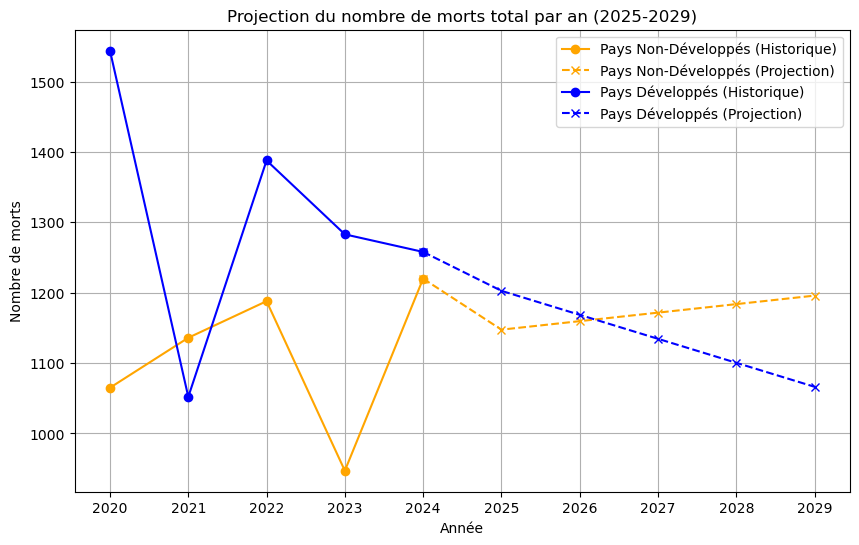

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('df_encoded.csv')

df_history = df[(df['year'] >= 2020) & (df['year'] <= 2024)]
df_grouped = df_history.groupby(['year', 'Developed'])['deaths'].sum().reset_index()
years_future = np.array([2025, 2026, 2027, 2028, 2029])

plt.figure(figsize=(10, 6))

colors = {0: 'orange', 1: 'blue'}
labels = {0: 'Pays Non-Développés', 1: 'Pays Développés'}

for developed_status in [0, 1]:
    data = df_grouped[df_grouped['Developed'] == developed_status]
    x_hist = data['year'].values
    y_hist = data['deaths'].values
    
    # Calcul de la tendance linéaire (Régression linéaire simple)
    # np.polyfit renvoie la pente (slope) et l'ordonnée à l'origine (intercept)
    slope, intercept = np.polyfit(x_hist, y_hist, 1)
    y_future = slope * years_future + intercept
    
    x_proj = np.concatenate(([x_hist[-1]], years_future))
    y_proj = np.concatenate(([y_hist[-1]], y_future))

    plt.plot(x_hist, y_hist, marker='o', label=f'{labels[developed_status]} (Historique)', color=colors[developed_status])
    plt.plot(x_proj, y_proj, linestyle='--', marker='x', label=f'{labels[developed_status]} (Projection)', color=colors[developed_status])

plt.title('Projection du nombre de morts total par an (2025-2029)')
plt.xlabel('Année')
plt.ylabel('Nombre de morts')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2020, 2030, 1)) 

plt.savefig('img/graphique mort projection.png')
plt.show()

### Projection impact économique avec ARIMA

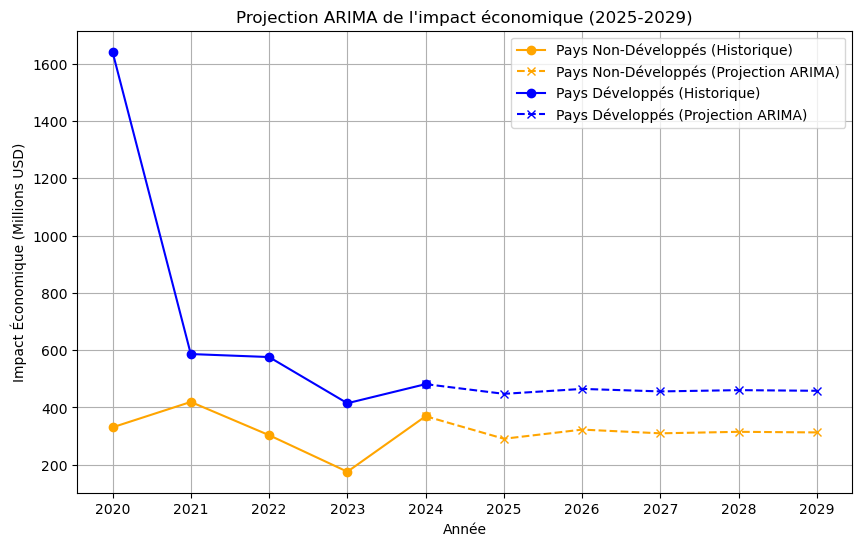

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv('df_encoded.csv')

df_history = df[(df['year'] >= 2020) & (df['year'] <= 2024)]
df_grouped = df_history.groupby(['year', 'Developed'])['economic_impact_million_usd'].sum().reset_index()

plt.figure(figsize=(10, 6))
colors = {0: 'orange', 1: 'blue'}
labels = {0: 'Pays Non-Développés', 1: 'Pays Développés'}
years_future = np.arange(2025, 2030)

for developed_status in [0, 1]:
    data = df_grouped[df_grouped['Developed'] == developed_status].sort_values('year')
    series = data['economic_impact_million_usd'].values
    years_hist = data['year'].values
    
    try:
        model = ARIMA(series, order=(1, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)
    except:
        model = ARIMA(series, order=(0, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)

    plt.plot(years_hist, series, marker='o', label=f'{labels[developed_status]} (Historique)', color=colors[developed_status])
    
    x_proj = np.concatenate(([years_hist[-1]], years_future))
    y_proj = np.concatenate(([series[-1]], forecast))
    
    plt.plot(x_proj, y_proj, linestyle='--', marker='x', label=f'{labels[developed_status]} (Projection ARIMA)', color=colors[developed_status])

plt.title("Projection ARIMA de l'impact économique (2025-2029)")
plt.xlabel('Année')
plt.ylabel('Impact Économique (Millions USD)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2020, 2030, 1))

plt.savefig('img/graphique impact financier projection (avec ARIMA).png')
plt.show()